 Build a machine learning model to predict whether a person makes over 50K a
year or not


## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Import dataset 

In [2]:
dataset=pd.read_csv("classification_2.csv")
dataset.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
#remane columns
dataset.columns=['age','workplace','fnlwgt','education','education_no','marital_status','occupation','relationship','race','gender','capital_loss','capital_gain','hrs_per_week','country','income']

In [4]:
dataset

,age,workplace,fnlwgt,education,education_no,marital_status,occupation,relationship,race,gender,capital_loss,capital_gain,hrs_per_week,country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Data cleaning 

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workplace       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_no    32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   gender          32560 non-null  object
 10  capital_loss    32560 non-null  int64 
 11  capital_gain    32560 non-null  int64 
 12  hrs_per_week    32560 non-null  int64 
 13  country         32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
dataset.isna().sum()

age               0
workplace         0
fnlwgt            0
education         0
education_no      0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_loss      0
capital_gain      0
hrs_per_week      0
country           0
income            0
dtype: int64

In [7]:
#Check noizy data
print(f"workplace={dataset.workplace.unique()}\neducation= {dataset.education.unique()}\n marital_status = {dataset.marital_status.unique()} \n occupation = {dataset.occupation.unique()}\n relationship = {dataset.relationship.unique()} \nrace= {dataset.relationship.unique()} \ngender = {dataset.gender.unique()} \n country = {dataset.country.unique()}")

workplace=[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education= [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 marital_status = [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed'] 
 occupation = [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
 relationship = [' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 
race= [' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 
gender = [' Male' ' Female'] 
 country = [' United-States' ' 

In [8]:
d1=dataset[(dataset['workplace']==' ?')|(dataset['country']==' ?')|(dataset['occupation']==' ?')].index
dataset.drop(d1,inplace=True)

In [9]:
dataset.shape

(30161, 15)

In [10]:
dataset

,age,workplace,fnlwgt,education,education_no,marital_status,occupation,relationship,race,gender,capital_loss,capital_gain,hrs_per_week,country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
#replace value with standard naming
dataset['education'].replace(' Preschool', 'dropout',inplace=True)
dataset['education'].replace(' 10th', 'dropout',inplace=True)
dataset['education'].replace(' 11th', 'dropout',inplace=True)
dataset['education'].replace(' 12th', 'dropout',inplace=True)
dataset['education'].replace(' 1st-4th', 'dropout',inplace=True)
dataset['education'].replace(' 5th-6th', 'dropout',inplace=True)
dataset['education'].replace(' 7th-8th', 'dropout',inplace=True)
dataset['education'].replace(' 9th', 'dropout',inplace=True)
dataset['education'].replace(' HS-Grad', 'HighGrad',inplace=True)
dataset['education'].replace(' HS-grad', 'HighGrad',inplace=True)
dataset['education'].replace(' Some-college', 'CommunityCollege',inplace=True)
dataset['education'].replace(' Assoc-acdm', 'CommunityCollege',inplace=True)
dataset['education'].replace(' Assoc-voc', 'CommunityCollege',inplace=True)
dataset['education'].replace(' Bachelors', 'Bachelors',inplace=True)
dataset['education'].replace(' Masters', 'Masters',inplace=True)
dataset['education'].replace(' Prof-school', 'Masters',inplace=True)
dataset['education'].replace(' Doctorate', 'Doctorate',inplace=True)

In [12]:
#replace value with standard naming
dataset['marital_status'].replace(' Never-married', 'NotMarried',inplace=True)
dataset['marital_status'].replace(' Married-AF-spouse', 'Married',inplace=True)
dataset['marital_status'].replace(' Married-civ-spouse', 'Married',inplace=True)
dataset['marital_status'].replace(' Married-spouse-absent', 'NotMarried',inplace=True)
dataset['marital_status'].replace(' Divorced', 'Separated',inplace=True)
dataset['marital_status'].replace(' Widowed', 'Widowed',inplace=True)

In [13]:
dataset


,age,workplace,fnlwgt,education,education_no,marital_status,occupation,relationship,race,gender,capital_loss,capital_gain,hrs_per_week,country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HighGrad,9,Separated,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,dropout,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,CommunityCollege,12,Married,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HighGrad,9,Married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HighGrad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HighGrad,9,NotMarried,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [14]:
dataset.shape

(30161, 15)

In [15]:
dataset.duplicated().sum()

23

In [16]:
dataset=dataset.drop_duplicates(keep='first')

In [17]:
dataset.shape

(30138, 15)

In [18]:
numeric_col=list(dataset.select_dtypes(include='int64'))
numeric_col

['age',
 'fnlwgt',
 'education_no',
 'capital_loss',
 'capital_gain',
 'hrs_per_week']

In [19]:
df1=dataset[numeric_col]
df1

,age,fnlwgt,education_no,capital_loss,capital_gain,hrs_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
32555,27,257302,12,0,0,38
32556,40,154374,9,0,0,40
32557,58,151910,9,0,0,40
32558,22,201490,9,0,0,20


### Check multicolinearity

In [20]:
corrmatrix=df1.corr()
corrmatrix

,age,fnlwgt,education_no,capital_loss,capital_gain,hrs_per_week
age,1.000000,-0.076279,0.043202,0.080162,0.060141,0.101349
fnlwgt,-0.076279,1.000000,-0.045161,0.000425,-0.009763,-0.023037
education_no,0.043202,-0.045161,1.000000,0.124452,0.079623,0.152848
capital_loss,0.080162,0.000425,0.124452,1.000000,-0.032254,0.080429
capital_gain,0.060141,-0.009763,0.079623,-0.032254,1.000000,0.052380
hrs_per_week,0.101349,-0.023037,0.152848,0.080429,0.052380,1.000000


<AxesSubplot:>

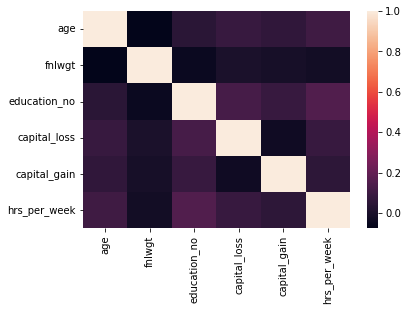

In [21]:
sns.heatmap(corrmatrix)

In [22]:
def correlation(df,threshold,corrmatrix):
    correlated_col=set()
    for i in range(len(corrmatrix.columns)):
        for j in range(i):
            if abs(corrmatrix.iloc[i,j])>=threshold:
                correlated_col.add(corrmatrix.columns[j])
    return correlated_col

In [23]:
threshold=0.5
corelatedcols=correlation(df1,threshold,corrmatrix)
corelatedcols

set()

## Data encoading

In [24]:
x=dataset.iloc[:,:len(dataset.columns)-1]
x

,age,workplace,fnlwgt,education,education_no,marital_status,occupation,relationship,race,gender,capital_loss,capital_gain,hrs_per_week,country
0,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,215646,HighGrad,9,Separated,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,234721,dropout,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,CommunityCollege,12,Married,Tech-support,Wife,White,Female,0,0,38,United-States
32556,40,Private,154374,HighGrad,9,Married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32557,58,Private,151910,HighGrad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32558,22,Private,201490,HighGrad,9,NotMarried,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [25]:
x_categorical_col=list(x.select_dtypes(include='object'))
x_categorical_col

['workplace',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'country']

In [26]:
lable_encoading=['education','marital_status','occupation']
cat_col=x[lable_encoading].astype('category')
for i in lable_encoading:
    cat_col[i]=cat_col[i].cat.codes
cat_col

,education,marital_status,occupation
0,0,1,3
1,3,3,5
2,5,1,5
3,0,1,9
4,4,1,3
...,...,...,...
32555,1,1,12
32556,3,1,6
32557,3,4,0
32558,3,2,0


In [27]:
one_hot_encoading=['workplace','relationship','race','gender','country']
x1=dataset[one_hot_encoading]
x1=pd.get_dummies(x1,columns=['workplace','relationship','race','gender','country'])
x1

,workplace_ Federal-gov,workplace_ Local-gov,workplace_ Private,workplace_ Self-emp-inc,workplace_ Self-emp-not-inc,workplace_ State-gov,workplace_ Without-pay,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
numeric_col=list(x.select_dtypes(include='int64'))
numeric_col

['age',
 'fnlwgt',
 'education_no',
 'capital_loss',
 'capital_gain',
 'hrs_per_week']

In [29]:
num_col=x[numeric_col]

In [30]:
x=pd.concat([cat_col,num_col,x1],axis=1)
x

,education,marital_status,occupation,age,fnlwgt,education_no,capital_loss,capital_gain,hrs_per_week,workplace_ Federal-gov,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
0,0,1,3,50,83311,13,0,0,13,0,...,0,0,0,0,0,0,0,1,0,0
1,3,3,5,38,215646,9,0,0,40,0,...,0,0,0,0,0,0,0,1,0,0
2,5,1,5,53,234721,7,0,0,40,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,9,28,338409,13,0,0,40,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,3,37,284582,14,0,0,40,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,1,1,12,27,257302,12,0,0,38,0,...,0,0,0,0,0,0,0,1,0,0
32556,3,1,6,40,154374,9,0,0,40,0,...,0,0,0,0,0,0,0,1,0,0
32557,3,4,0,58,151910,9,0,0,40,0,...,0,0,0,0,0,0,0,1,0,0
32558,3,2,0,22,201490,9,0,0,20,0,...,0,0,0,0,0,0,0,1,0,0


## Feature scalling 

In [31]:
def standardScalling(x):
    x_mean=np.mean(x,axis=0)
    x_std=np.std(x,axis=0)
    x_scale=(x-x_mean)/x_std
    return x_scale

In [32]:
for i in range(len(x.columns)):
    x.iloc[:,i]=standardScalling(x.iloc[:,i].values)

In [33]:
x

,education,marital_status,occupation,age,fnlwgt,education_no,capital_loss,capital_gain,hrs_per_week,workplace_ Federal-gov,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
0,-1.356479,-0.778915,-0.734634,0.880201,-1.007866,1.129039,-0.147495,-0.218677,-2.332024,-0.179722,...,-0.033607,-0.060248,-0.019108,-0.048594,-0.037357,-0.023757,-0.024446,0.310621,-0.046131,-0.023047
1,0.485365,1.563193,-0.238346,-0.033637,0.244634,-0.440398,-0.147495,-0.218677,-0.078033,-0.179722,...,-0.033607,-0.060248,-0.019108,-0.048594,-0.037357,-0.023757,-0.024446,0.310621,-0.046131,-0.023047
2,1.713261,-0.778915,-0.238346,1.108661,0.425172,-1.225117,-0.147495,-0.218677,-0.078033,-0.179722,...,-0.033607,-0.060248,-0.019108,-0.048594,-0.037357,-0.023757,-0.024446,0.310621,-0.046131,-0.023047
3,-1.356479,-0.778915,0.754229,-0.795169,1.406540,1.129039,-0.147495,-0.218677,-0.078033,-0.179722,...,-0.033607,-0.060248,-0.019108,-0.048594,-0.037357,-0.023757,-0.024446,-3.219356,-0.046131,-0.023047
4,1.099313,-0.778915,-0.734634,-0.109790,0.897087,1.521398,-0.147495,-0.218677,-0.078033,-0.179722,...,-0.033607,-0.060248,-0.019108,-0.048594,-0.037357,-0.023757,-0.024446,0.310621,-0.046131,-0.023047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.742531,-0.778915,1.498661,-0.871322,0.638893,0.736679,-0.147495,-0.218677,-0.244995,-0.179722,...,-0.033607,-0.060248,-0.019108,-0.048594,-0.037357,-0.023757,-0.024446,0.310621,-0.046131,-0.023047
32556,0.485365,-0.778915,0.009798,0.118669,-0.335282,-0.440398,-0.147495,-0.218677,-0.078033,-0.179722,...,-0.033607,-0.060248,-0.019108,-0.048594,-0.037357,-0.023757,-0.024446,0.310621,-0.046131,-0.023047
32557,0.485365,2.734247,-1.479065,1.489427,-0.358603,-0.440398,-0.147495,-0.218677,-0.078033,-0.179722,...,-0.033607,-0.060248,-0.019108,-0.048594,-0.037357,-0.023757,-0.024446,0.310621,-0.046131,-0.023047
32558,0.485365,0.392139,-1.479065,-1.252088,0.110653,-0.440398,-0.147495,-0.218677,-1.747656,-0.179722,...,-0.033607,-0.060248,-0.019108,-0.048594,-0.037357,-0.023757,-0.024446,0.310621,-0.046131,-0.023047


In [34]:
y=dataset.iloc[:,-1]
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name: income, Length: 30138, dtype: object

In [35]:
y=y.astype('category')
y.dtype

CategoricalDtype(categories=[' <=50K', ' >50K'], ordered=False)

In [36]:
y=y.cat.codes
y=y.values
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int8)

In [37]:
split_ratio=0.8
split_index=int(split_ratio*len(x))
x_train=x[:split_index].values
x_test=x[split_index:].values
y_train=y[:split_index]
y_test=y[split_index:]

In [38]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((24110, 70), (24110,), (6028, 70), (6028,))

## Building model for Logistic Regression

In [39]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
y_train.shape,y_test.shape

((24110, 1), (6028, 1))

In [40]:
theta=np.zeros((1,(len(x_train[1,:])+1)))
theta.shape

(1, 71)

In [41]:
x1=np.ones((x_train.shape[0],1))
x_train=np.concatenate((x1,x_train),axis=1)
x_train.shape

(24110, 71)

In [42]:
x1=np.ones((x_test.shape[0],1))
x_test=np.concatenate((x1,x_test),axis=1)
x_test.shape

(6028, 71)

In [43]:
def compute_cost(x_train,y_train,theta): 
    """
    Description :
        This function is used to calculate cost
    Parameters :
        x_train: actual data traing
        y_train:prdicted data traing
        theta:parameters
    Return :
        It returns the cost
    """ 
    z=np.dot(x_train,theta.T)
    sigmoid_hx=1/(1+np.exp(-z))
    cost=-(1/len(x_train))*np.sum(((y_train*np.log(sigmoid_hx))+((1-y_train)*(np.log(1-sigmoid_hx)))))
    return cost   

In [44]:
def gradient_descent(x_train,y_train,theta,alpha,epoch):
    """
    Description :
        This function is used to update paramenter(theata)
    Parameters :
        x_train: actual data traing
        y_train:prdicted data traing
        theta:parameters
        alpha : learning rate
        epoch :number of iterations
    Return :
        It returns the updated theta
    """ 
    cost_list=[]
    for i in range(epoch):
        z=np.dot(x_train,theta.T)
        sigmoid_hx=1/(1+np.exp(-z))           
        theta=theta-alpha/(len(x_train))*np.sum((sigmoid_hx-y_train)*x_train,axis=0)
        cost=compute_cost(x_train,y_train,theta)
        cost_list.append(cost)
        print(f"Epoch {i+1} theta0 = {theta[0][0]} theta1 = {theta[0][1]} cost = {cost}")
    return theta,cost,cost_list

In [45]:
epoch=2000
alpha=0.1
result_theta,cost,cost_list=gradient_descent(x_train,y_train,theta,alpha,epoch)
print(result_theta,cost)

Epoch 1 theta0 = -0.025221899626710908 theta1 = -0.0055268461500765816 cost = 0.6714062541230198
Epoch 2 theta0 = -0.04981139450430363 theta1 = -0.010666738714624601 cost = 0.6521839583234897
Epoch 3 theta0 = -0.07378804958896579 theta1 = -0.015445153304538276 cost = 0.635107726651537
Epoch 4 theta0 = -0.09717327420531754 theta1 = -0.01988772666357595 cost = 0.6198594089110269
Epoch 5 theta0 = -0.11998924782524362 theta1 = -0.02401939710801153 cost = 0.6061701423969286
Epoch 6 theta0 = -0.14225816794124116 theta1 = -0.027863865455880963 cost = 0.5938142187863037
Epoch 7 theta0 = -0.16400175041786225 theta1 = -0.03144329771959417 cost = 0.5826028467833662
Epoch 8 theta0 = -0.18524091824654648 theta1 = -0.03477819811172536 cost = 0.5723783241101595
Epoch 9 theta0 = -0.2059956254300949 theta1 = -0.0378873948975227 cost = 0.5630088614416237
Epoch 10 theta0 = -0.22628477441315176 theta1 = -0.040788096309925435 cost = 0.5543841313427043
Epoch 11 theta0 = -0.2461261960012302 theta1 = -0.04349

Epoch 107 theta0 = -1.1698821903701526 theta1 = -0.06899509671355065 cost = 0.37583448739298414
Epoch 108 theta0 = -1.1745265659304862 theta1 = -0.06871726258612675 cost = 0.3754483392484712
Epoch 109 theta0 = -1.1791210999809103 theta1 = -0.06843829385839414 cost = 0.37506893305992534
Epoch 110 theta0 = -1.1836665871252734 theta1 = -0.06815825303405063 cost = 0.37469610357952643
Epoch 111 theta0 = -1.1881638052361503 theta1 = -0.06787720025284445 cost = 0.37432969069755245
Epoch 112 theta0 = -1.1926135158797035 theta1 = -0.0675951933927897 cost = 0.3739695392503616
Epoch 113 theta0 = -1.1970164647282784 theta1 = -0.06731228816748859 cost = 0.37361549883670464
Epoch 114 theta0 = -1.201373381961118 theta1 = -0.06702853821881212 cost = 0.3732674236419572
Epoch 115 theta0 = -1.205684982653576 theta1 = -0.06674399520517658 cost = 0.37292517226988386
Epoch 116 theta0 = -1.2099519671551822 theta1 = -0.06645870888564091 cost = 0.3725886075815685
Epoch 117 theta0 = -1.2141750214569174 theta1 =

Epoch 214 theta0 = -1.4856080907764713 theta1 = -0.03891073308797075 cost = 0.3548033776681711
Epoch 215 theta0 = -1.4874593959013536 theta1 = -0.038653572607281486 cost = 0.35470665273324403
Epoch 216 theta0 = -1.4892977883924845 theta1 = -0.03839707365207056 cost = 0.35461085363150413
Epoch 217 theta0 = -1.4911233964952646 theta1 = -0.03814123809363537 cost = 0.3545159673869872
Epoch 218 theta0 = -1.4929363467270935 theta1 = -0.037886067729897915 cost = 0.35442198125741425
Epoch 219 theta0 = -1.4947367639069329 theta1 = -0.03763156428701397 cost = 0.3543288827290734
Epoch 220 theta0 = -1.4965247711842637 theta1 = -0.03737772942093864 cost = 0.354236659511834
Epoch 221 theta0 = -1.4983004900674493 theta1 = -0.037124564718949836 cost = 0.3541452995342886
Epoch 222 theta0 = -1.5000640404515213 theta1 = -0.03687207170113104 cost = 0.3540547909390192
Epoch 223 theta0 = -1.5018155406454 theta1 = -0.036620251821814845 cost = 0.35396512207798436
Epoch 224 theta0 = -1.503555107398563 theta1 =

Epoch 309 theta0 = -1.6173852047529573 theta1 = -0.017526458730906854 cost = 0.34848286695722785
Epoch 310 theta0 = -1.61841150175281 theta1 = -0.017333799825086607 cost = 0.34843748159268195
Epoch 311 theta0 = -1.619432105650528 theta1 = -0.0171417904013203 cost = 0.34839239466861893
Epoch 312 theta0 = -1.6204470590213613 theta1 = -0.016950429227891663 cost = 0.3483476031910648
Epoch 313 theta0 = -1.6214564040184378 theta1 = -0.016759715062377882 cost = 0.3483031042052924
Epoch 314 theta0 = -1.622460182378112 theta1 = -0.016569646651884467 cost = 0.34825889479519695
Epoch 315 theta0 = -1.6234584354252304 theta1 = -0.016380222733276405 cost = 0.348214972082684
Epoch 316 theta0 = -1.6244512040783163 theta1 = -0.0161914420334057 cost = 0.34817133322706806
Epoch 317 theta0 = -1.6254385288546747 theta1 = -0.01600330326933533 cost = 0.3481279754244824
Epoch 318 theta0 = -1.626420449875418 theta1 = -0.015815805148559722 cost = 0.34808489590730085
Epoch 319 theta0 = -1.6273970068704167 theta1

Epoch 405 theta0 = -1.6948948187632666 theta1 = -0.0017928471384657568 cost = 0.3451596661579632
Epoch 406 theta0 = -1.69552221698657 theta1 = -0.0016559939178444104 cost = 0.34513334872631307
Epoch 407 theta0 = -1.6961466434644594 theta1 = -0.001519647398382422 cost = 0.34510715968653755
Epoch 408 theta0 = -1.6967681164061639 theta1 = -0.0013838060180364293 cost = 0.3450810980618247
Epoch 409 theta0 = -1.6973866538777977 theta1 = -0.0012484682158889595 cost = 0.34505516288539706
Epoch 410 theta0 = -1.6980022738037808 theta1 = -0.0011136324322008652 cost = 0.3450293532003852
Epoch 411 theta0 = -1.6986149939682402 theta1 = -0.0009792971084628904 cost = 0.3450036680597042
Epoch 412 theta0 = -1.699224832016397 theta1 = -0.0008454606874463738 cost = 0.34497810652593036
Epoch 413 theta0 = -1.699831805455934 theta1 = -0.0007121216132531094 cost = 0.34495266767118155
Epoch 414 theta0 = -1.7004359316583488 theta1 = -0.0005792783313643673 cost = 0.3449273505769983
Epoch 415 theta0 = -1.70103722

Epoch 501 theta0 = -1.7437734788803698 theta1 = 0.009251430520071264 cost = 0.3431061331465912
Epoch 502 theta0 = -1.7441820262130712 theta1 = 0.00934647230014466 cost = 0.3430887921025434
Epoch 503 theta0 = -1.7445888548982267 theta1 = 0.009441147010724231 cost = 0.3430715181019937
Epoch 504 theta0 = -1.7449939740432099 theta1 = 0.0095354559601527 cost = 0.3430543107450138
Epoch 505 theta0 = -1.7453973926952366 theta1 = 0.009629400453326534 cost = 0.3430371696350042
Epoch 506 theta0 = -1.7457991198418548 theta1 = 0.009722981791690514 cost = 0.3430200943786598
Epoch 507 theta0 = -1.7461991644114307 theta1 = 0.009816201273232556 cost = 0.3430030845859364
Epoch 508 theta0 = -1.7465975352736303 theta1 = 0.00990906019247877 cost = 0.342986139870016
Epoch 509 theta0 = -1.7469942412398949 theta1 = 0.010001559840488717 cost = 0.3429692598472739
Epoch 510 theta0 = -1.7473892910639128 theta1 = 0.010093701504850918 cost = 0.34295244413724557
Epoch 511 theta0 = -1.747782693442087 theta1 = 0.01018

Epoch 595 theta0 = -1.7757255311828484 theta1 = 0.01674562525252707 cost = 0.34172405797033584
Epoch 596 theta0 = -1.7760055386661913 theta1 = 0.01681141322214283 cost = 0.3417116307624882
Epoch 597 theta0 = -1.7762844741635337 theta1 = 0.016876941872101026 cost = 0.341699243941193
Epoch 598 theta0 = -1.7765623427587138 theta1 = 0.016942212186039887 cost = 0.3416868973107819
Epoch 599 theta0 = -1.7768391495060614 theta1 = 0.017007225144314683 cost = 0.3416745906769311
Epoch 600 theta0 = -1.7771148994306047 theta1 = 0.017071981724003905 cost = 0.3416623238466497
Epoch 601 theta0 = -1.7773895975282759 theta1 = 0.01713648289891549 cost = 0.3416500966282675
Epoch 602 theta0 = -1.777663248766113 theta1 = 0.017200729639593074 cost = 0.34163790883142386
Epoch 603 theta0 = -1.7779358580824625 theta1 = 0.017264722913322338 cost = 0.3416257602670556
Epoch 604 theta0 = -1.778207430387178 theta1 = 0.017328463684137346 cost = 0.34161365074738614
Epoch 605 theta0 = -1.7784779705618194 theta1 = 0.017

Epoch 689 theta0 = -1.7979621377342037 theta1 = 0.021918417035035817 cost = 0.34070973803256216
Epoch 690 theta0 = -1.798160191421215 theta1 = 0.021963709171844033 cost = 0.340700401691851
Epoch 691 theta0 = -1.7983575452215697 theta1 = 0.022008821030995943 cost = 0.3406910919411206
Epoch 692 theta0 = -1.7985542021588503 theta1 = 0.022053753318579377 cost = 0.34068180867221337
Epoch 693 theta0 = -1.7987501652407802 theta1 = 0.022098506738090367 cost = 0.3406725517775925
Epoch 694 theta0 = -1.798945437459322 theta1 = 0.022143081990440888 cost = 0.34066332115033693
Epoch 695 theta0 = -1.7991400217907747 theta1 = 0.022187479773966595 cost = 0.34065411668413687
Epoch 696 theta0 = -1.7993339211958714 theta1 = 0.022231700784434545 cost = 0.34064493827328923
Epoch 697 theta0 = -1.799527138619875 theta1 = 0.022275745715050928 cost = 0.340635785812693
Epoch 698 theta0 = -1.7997196769926738 theta1 = 0.02231961525646878 cost = 0.34062665919784474
Epoch 699 theta0 = -1.7999115392288767 theta1 = 0.

Epoch 776 theta0 = -1.812863021070089 theta1 = 0.025253769407946935 cost = 0.339986712689346
Epoch 777 theta0 = -1.8130100100523547 theta1 = 0.025285761102850392 cost = 0.3399793417826901
Epoch 778 theta0 = -1.8131565118980937 theta1 = 0.025317625056771723 cost = 0.33997198996194916
Epoch 779 theta0 = -1.8133025285547242 theta1 = 0.02534936177836128 cost = 0.33996465715912366
Epoch 780 theta0 = -1.8134480619602136 theta1 = 0.025380971774314948 cost = 0.3399573433065495
Epoch 781 theta0 = -1.813593114043132 theta1 = 0.02541245554938088 cost = 0.3399500483368954
Epoch 782 theta0 = -1.8137376867227053 theta1 = 0.025443813606366227 cost = 0.3399427721831609
Epoch 783 theta0 = -1.813881781908868 theta1 = 0.025475046446143835 cost = 0.3399355147786742
Epoch 784 theta0 = -1.8140254015023165 theta1 = 0.025506154567658937 cost = 0.33992827605708953
Epoch 785 theta0 = -1.814168547394561 theta1 = 0.025537138467935833 cost = 0.33992105595238586
Epoch 786 theta0 = -1.8143112214679775 theta1 = 0.025

Epoch 874 theta0 = -1.8252179438408367 theta1 = 0.027852546758183324 cost = 0.3393458147942896
Epoch 875 theta0 = -1.8253251845311667 theta1 = 0.027874163421652002 cost = 0.3393400351959326
Epoch 876 theta0 = -1.8254320910614614 theta1 = 0.027895693868215915 cost = 0.33933426933284216
Epoch 877 theta0 = -1.8255386646627325 theta1 = 0.027917138444522798 cost = 0.3393285171616262
Epoch 878 theta0 = -1.8256449065604612 theta1 = 0.02793849749584806 cost = 0.3393227786390774
Epoch 879 theta0 = -1.825750817974628 theta1 = 0.027959771366099905 cost = 0.33931705372217136
Epoch 880 theta0 = -1.8258564001197408 theta1 = 0.027980960397824446 cost = 0.3393113423680659
Epoch 881 theta0 = -1.825961654204864 theta1 = 0.028002064932210774 cost = 0.33930564453410045
Epoch 882 theta0 = -1.8260665814336468 theta1 = 0.028023085309096054 cost = 0.3392999601777944
Epoch 883 theta0 = -1.8261711830043517 theta1 = 0.028044021866970574 cost = 0.3392942892568462
Epoch 884 theta0 = -1.8262754601098825 theta1 = 0.

Epoch 965 theta0 = -1.8337444725537557 theta1 = 0.029505277303310918 cost = 0.33887129466137655
Epoch 966 theta0 = -1.833825744015393 theta1 = 0.029520313991590857 cost = 0.3388666072093152
Epoch 967 theta0 = -1.8339067738025339 theta1 = 0.02953529096865251 cost = 0.33886193018986477
Epoch 968 theta0 = -1.8339875627434292 theta1 = 0.029550208475351038 cost = 0.33885726357291496
Epoch 969 theta0 = -1.834068111662851 theta1 = 0.029565066751572736 cost = 0.3388526073284691
Epoch 970 theta0 = -1.8341484213821095 theta1 = 0.02957986603623882 cost = 0.33884796142664403
Epoch 971 theta0 = -1.834228492719071 theta1 = 0.029594606567309178 cost = 0.3388433258376696
Epoch 972 theta0 = -1.8343083264881743 theta1 = 0.029609288581786117 cost = 0.33883870053188764
Epoch 973 theta0 = -1.8343879235004474 theta1 = 0.029623912315718103 cost = 0.33883408547975213
Epoch 974 theta0 = -1.8344672845635244 theta1 = 0.029638478004203474 cost = 0.3388294806518278
Epoch 975 theta0 = -1.8345464104816624 theta1 = 0

Epoch 1058 theta0 = -1.8403669801566251 theta1 = 0.0306768569777103 cost = 0.3384763909867018
Epoch 1059 theta0 = -1.8404289132260743 theta1 = 0.030687255526018607 cost = 0.3384725582664901
Epoch 1060 theta0 = -1.8404906687396296 theta1 = 0.03069761307035415 cost = 0.33846873360224927
Epoch 1061 theta0 = -1.8405522472644873 theta1 = 0.030707929775980795 cost = 0.3384649169724521
Epoch 1062 theta0 = -1.8406136493656162 theta1 = 0.03071820580749191 cost = 0.33846110835564547
Epoch 1063 theta0 = -1.8406748756057687 theta1 = 0.030728441328813055 cost = 0.3384573077304495
Epoch 1064 theta0 = -1.8407359265454908 theta1 = 0.030738636503204658 cost = 0.3384535150755577
Epoch 1065 theta0 = -1.8407968027431325 theta1 = 0.03074879149326467 cost = 0.3384497303697366
Epoch 1066 theta0 = -1.8408575047548579 theta1 = 0.030758906460931205 cost = 0.3384459535918248
Epoch 1067 theta0 = -1.8409180331346553 theta1 = 0.03076898156748521 cost = 0.33844218472073373
Epoch 1068 theta0 = -1.8409783884343474 the

Epoch 1155 theta0 = -1.8456243157045482 theta1 = 0.031516808218634874 cost = 0.33813918844162116
Epoch 1156 theta0 = -1.8456713710009136 theta1 = 0.03152390866130257 cost = 0.33813604679285025
Epoch 1157 theta0 = -1.845718294746047 theta1 = 0.03153098137102842 cost = 0.338132911413574
Epoch 1158 theta0 = -1.8457650873322557 theta1 = 0.03153802645913684 cost = 0.338129782288149
Epoch 1159 theta0 = -1.8458117491504102 theta1 = 0.03154504403649922 cost = 0.3381266594009813
Epoch 1160 theta0 = -1.8458582805899515 theta1 = 0.03155203421353576 cost = 0.3381235427365262
Epoch 1161 theta0 = -1.8459046820388965 theta1 = 0.03155899710021731 cost = 0.3381204322792879
Epoch 1162 theta0 = -1.845950953883845 theta1 = 0.03156593280606722 cost = 0.3381173280138188
Epoch 1163 theta0 = -1.8459970965099854 theta1 = 0.0315728414401631 cost = 0.33811422992472073
Epoch 1164 theta0 = -1.846043110301101 theta1 = 0.031579723111138686 cost = 0.3381111379966429
Epoch 1165 theta0 = -1.8460889956395758 theta1 = 0.

Epoch 1252 theta0 = -1.8496294186234756 theta1 = 0.032091382344409294 cost = 0.3378614919058822
Epoch 1253 theta0 = -1.8496653481959469 theta1 = 0.03209625015743721 cost = 0.33785889221023135
Epoch 1254 theta0 = -1.8497011784124535 theta1 = 0.03210109917448705 cost = 0.3378562974703733
Epoch 1255 theta0 = -1.8497369095511789 theta1 = 0.03210592947052307 cost = 0.3378537076746615
Epoch 1256 theta0 = -1.849772541889356 theta1 = 0.03211074112020479 cost = 0.33785112281148266
Epoch 1257 theta0 = -1.8498080757032722 theta1 = 0.03211553419788823 cost = 0.3378485428692578
Epoch 1258 theta0 = -1.849843511268272 theta1 = 0.03212030877762717 cost = 0.33784596783644244
Epoch 1259 theta0 = -1.8498788488587623 theta1 = 0.03212506493317439 cost = 0.3378433977015246
Epoch 1260 theta0 = -1.849914088748215 theta1 = 0.03212980273798286 cost = 0.337840832453027
Epoch 1261 theta0 = -1.8499492312091719 theta1 = 0.032134522265207036 cost = 0.3378382720795049
Epoch 1262 theta0 = -1.8499842765132475 theta1 = 

Epoch 1341 theta0 = -1.8524674971418975 theta1 = 0.032458830794010775 cost = 0.33764828164272886
Epoch 1342 theta0 = -1.8524955743622704 theta1 = 0.03246228756370733 cost = 0.3376460809956536
Epoch 1343 theta0 = -1.8525235736681769 theta1 = 0.03246573114594311 cost = 0.3376438843885391
Epoch 1344 theta0 = -1.8525514952667028 theta1 = 0.032469161592915186 cost = 0.3376416918123458
Epoch 1345 theta0 = -1.8525793393642704 theta1 = 0.032472578956609155 cost = 0.33763950325805875
Epoch 1346 theta0 = -1.85260710616664 theta1 = 0.03247598328880001 cost = 0.3376373187166886
Epoch 1347 theta0 = -1.8526347958789133 theta1 = 0.03247937464105299 cost = 0.3376351381792693
Epoch 1348 theta0 = -1.8526624087055352 theta1 = 0.03248275306472444 cost = 0.33763296163686113
Epoch 1349 theta0 = -1.852689944850297 theta1 = 0.032486118610962685 cost = 0.3376307890805484
Epoch 1350 theta0 = -1.8527174045163386 theta1 = 0.03248947133070887 cost = 0.33762862050143894
Epoch 1351 theta0 = -1.8527447879061516 theta

Epoch 1435 theta0 = -1.8547920584370803 theta1 = 0.032732521381394875 cost = 0.3374579395007254
Epoch 1436 theta0 = -1.8548136351551114 theta1 = 0.03273494079504953 cost = 0.3374560822028302
Epoch 1437 theta0 = -1.8548351508365701 theta1 = 0.03273735110948576 cost = 0.3374542281938992
Epoch 1438 theta0 = -1.854856605636036 theta1 = 0.032739752360374616 cost = 0.3374523774669103
Epoch 1439 theta0 = -1.8548779997076243 theta1 = 0.03274214458324338 cost = 0.33745053001486164
Epoch 1440 theta0 = -1.8548993332049872 theta1 = 0.032744527813476136 cost = 0.33744868583076804
Epoch 1441 theta0 = -1.8549206062813155 theta1 = 0.03274690208631437 cost = 0.33744684490766336
Epoch 1442 theta0 = -1.8549418190893403 theta1 = 0.032749267436857535 cost = 0.33744500723859927
Epoch 1443 theta0 = -1.854962971781335 theta1 = 0.03275162390006366 cost = 0.33744317281664576
Epoch 1444 theta0 = -1.8549840645091167 theta1 = 0.03275397151074991 cost = 0.33744134163489065
Epoch 1445 theta0 = -1.8550050974240477 th

Epoch 1529 theta0 = -1.8565728705887337 theta1 = 0.03292454703765274 cost = 0.3372968412875373
Epoch 1530 theta0 = -1.8565893280801908 theta1 = 0.03292624943910307 cost = 0.33729526475367677
Epoch 1531 theta0 = -1.856605737242772 theta1 = 0.032927945537944904 cost = 0.33729369092173456
Epoch 1532 theta0 = -1.856622098193957 theta1 = 0.032929635358609086 cost = 0.33729211978618556
Epoch 1533 theta0 = -1.8566384110508931 theta1 = 0.03293131892542862 cost = 0.3372905513415182
Epoch 1534 theta0 = -1.8566546759303972 theta1 = 0.03293299626263905 cost = 0.33728898558223347
Epoch 1535 theta0 = -1.8566708929489564 theta1 = 0.03293466739437887 cost = 0.3372874225028479
Epoch 1536 theta0 = -1.8566870622227292 theta1 = 0.03293633234468992 cost = 0.3372858620978895
Epoch 1537 theta0 = -1.8567031838675467 theta1 = 0.032937991137517775 cost = 0.3372843043619011
Epoch 1538 theta0 = -1.8567192579989138 theta1 = 0.03293964379671213 cost = 0.337282749289439
Epoch 1539 theta0 = -1.85673528473201 theta1 =

Epoch 1626 theta0 = -1.8579604686785014 theta1 = 0.0330636222540833 cost = 0.3371557279313236
Epoch 1627 theta0 = -1.8579727400086015 theta1 = 0.03306481390835629 cost = 0.3371543896441349
Epoch 1628 theta0 = -1.8579849730142124 theta1 = 0.033066001227764985 cost = 0.337153053581123
Epoch 1629 theta0 = -1.8579971677853415 theta1 = 0.0330671842288859 cost = 0.33715171973791924
Epoch 1630 theta0 = -1.8580093244117564 theta1 = 0.03306836292822969 cost = 0.33715038811016695
Epoch 1631 theta0 = -1.8580214429829862 theta1 = 0.03306953734224138 cost = 0.33714905869351974
Epoch 1632 theta0 = -1.8580335235883223 theta1 = 0.033070707487300614 cost = 0.3371477314836398
Epoch 1633 theta0 = -1.8580455663168187 theta1 = 0.03307187337972197 cost = 0.33714640647620137
Epoch 1634 theta0 = -1.858057571257293 theta1 = 0.03307303503575519 cost = 0.3371450836668889
Epoch 1635 theta0 = -1.8580695384983275 theta1 = 0.033074192471585454 cost = 0.33714376305139593
Epoch 1636 theta0 = -1.858081468128269 theta1 

Epoch 1720 theta0 = -1.858957832505601 theta1 = 0.03315872494194381 cost = 0.33703909531940807
Epoch 1721 theta0 = -1.858966864878255 theta1 = 0.033159573501346185 cost = 0.3370379483138944
Epoch 1722 theta0 = -1.858975866436375 theta1 = 0.03316041902879589 cost = 0.337036803163485
Epoch 1723 theta0 = -1.8589848372504991 theta1 = 0.033161261535710085 cost = 0.33703565986466744
Epoch 1724 theta0 = -1.858993777390988 theta1 = 0.03316210103346091 cost = 0.33703451841393717
Epoch 1725 theta0 = -1.859002686928024 theta1 = 0.03316293753337569 cost = 0.33703337880779594
Epoch 1726 theta0 = -1.8590115659316138 theta1 = 0.033163771046737116 cost = 0.33703224104275453
Epoch 1727 theta0 = -1.8590204144715874 theta1 = 0.03316460158478341 cost = 0.33703110511533224
Epoch 1728 theta0 = -1.8590292326175994 theta1 = 0.03316542915870852 cost = 0.3370299710220552
Epoch 1729 theta0 = -1.8590380204391292 theta1 = 0.033166253779662286 cost = 0.337028838759457
Epoch 1730 theta0 = -1.8590467780054818 theta1 

Epoch 1815 theta0 = -1.8596875485536017 theta1 = 0.033227247362382945 cost = 0.33693795069353444
Epoch 1816 theta0 = -1.8596939455196306 theta1 = 0.03322785317246517 cost = 0.3369369652727286
Epoch 1817 theta0 = -1.8597003176480997 theta1 = 0.033228456857227424 cost = 0.33693598140600983
Epoch 1818 theta0 = -1.8597066649948426 theta1 = 0.03322905842452877 cost = 0.33693499909053176
Epoch 1819 theta0 = -1.859712987615559 theta1 = 0.03322965788219759 cost = 0.3369340183234569
Epoch 1820 theta0 = -1.8597192855658151 theta1 = 0.03323025523803169 cost = 0.33693303910195227
Epoch 1821 theta0 = -1.8597255589010444 theta1 = 0.03323085049979848 cost = 0.33693206142319143
Epoch 1822 theta0 = -1.8597318076765474 theta1 = 0.03323144367523503 cost = 0.33693108528435245
Epoch 1823 theta0 = -1.8597380319474923 theta1 = 0.033232034772048225 cost = 0.3369301106826227
Epoch 1824 theta0 = -1.8597442317689155 theta1 = 0.03323262379791489 cost = 0.33692913761519294
Epoch 1825 theta0 = -1.8597504071957218 t

Epoch 1912 theta0 = -1.860200202684272 theta1 = 0.033277175354902634 cost = 0.33684920165653803
Epoch 1913 theta0 = -1.8602044318967768 theta1 = 0.03327760747352984 cost = 0.33684835459437695
Epoch 1914 theta0 = -1.8602086411172438 theta1 = 0.03327803810286104 cost = 0.33684750883690967
Epoch 1915 theta0 = -1.8602128303901477 theta1 = 0.033278467248285266 cost = 0.3368466643818236
Epoch 1916 theta0 = -1.860216999759861 theta1 = 0.03327889491517075 cost = 0.33684582122681034
Epoch 1917 theta0 = -1.8602211492706546 theta1 = 0.03327932110886501 cost = 0.3368449793695654
Epoch 1918 theta0 = -1.8602252789666984 theta1 = 0.03327974583469494 cost = 0.3368441388077916
Epoch 1919 theta0 = -1.8602293888920611 theta1 = 0.03328016909796688 cost = 0.336843299539194
Epoch 1920 theta0 = -1.860233479090711 theta1 = 0.03328059090396671 cost = 0.3368424615614829
Epoch 1921 theta0 = -1.8602375496065156 theta1 = 0.03328101125795992 cost = 0.3368416248723739
Epoch 1922 theta0 = -1.8602416004832425 theta1 =

In [46]:
cost_list

[0.6714062541230198,
 0.6521839583234897,
 0.635107726651537,
 0.6198594089110269,
 0.6061701423969286,
 0.5938142187863037,
 0.5826028467833662,
 0.5723783241101595,
 0.5630088614416237,
 0.5543841313427043,
 0.546411520229499,
 0.5390130151516289,
 0.5321226402139267,
 0.5256843565357613,
 0.5196503466059379,
 0.5139796139905385,
 0.5086368400295976,
 0.5035914491553944,
 0.49881684325523235,
 0.4942897729528601,
 0.48998981985711426,
 0.4858989688691299,
 0.4820012537199874,
 0.47828246219363485,
 0.47472989012243,
 0.47133213535017415,
 0.4680789245441012,
 0.4649609670877379,
 0.46196983136912584,
 0.45909783964817313,
 0.4563379783863185,
 0.45368382148571346,
 0.4511294643410728,
 0.44866946697687216,
 0.4462988048428543,
 0.4440128260854767,
 0.4418072143128239,
 0.4396779560342779,
 0.43762131209075844,
 0.43563379250214884,
 0.4337121342500349,
 0.43185328158965375,
 0.4300543685478637,
 0.42831270331630644,
 0.4266257542926326,
 0.42499113755921664,
 0.42340660561944815,
 0.

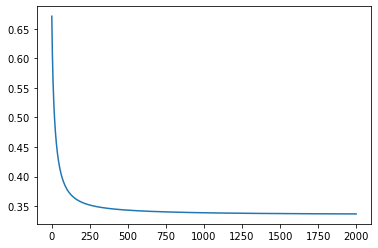

In [47]:
plt.plot(np.arange(epoch),cost_list)

In [48]:
z=np.dot(x_test,result_theta.T)
y_pred=1/(1+np.exp(-z))
y_pred=y_pred>0.5
y_pred=np.array(y_pred,dtype='int64')

## Performance matrix


In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score

In [50]:
confusion_matrix1=confusion_matrix(y_test,y_pred)
confusion_matrix1

array([[4174,  322],
       [ 622,  910]], dtype=int64)

In [51]:
acc=round(accuracy_score(y_test,y_pred),2)
acc

0.84

In [59]:
precision=precision_score(y_test,y_pred,average='weighted')
precision

0.8365920056630197

In [53]:
recall=recall_score(y_test,y_pred,average='weighted')
recall

0.8433974784339748

In [54]:
F1_score=f1_score(y_test,y_pred,average='weighted')
F1_score

0.8374268105330801

### cross check with library 

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
clf=LogisticRegression()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.843065693430657